<a href="https://colab.research.google.com/github/AjayR07/Online_Attendance_Consolidator/blob/main/KecStudent%2B_Attendance_ERP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

---




># 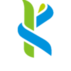
>#  KecStudent+ Attendance ERP 


---
---

# Instructions to use :


1.   Select Section-1 and  Click on run cells

2.   FIll the Form and Run the next Section

2.   Enter the Nominal Roll Google Sheet Share URL [Click to download Sample Format](https://docs.google.com/spreadsheets/d/1fnnBZFB6bKSlL4bUM52yRPh4vgoMkzejWTUQjllXldw/edit?usp=sharing)

3.   Upload the Attendance Report

4.   Attendance will be updated in the Nominal Roll


---
---













# Section ~ 1        
*( Ctrl+Shift+Enter )*  or Click Run Cells Button

In [ ]:
#@title
# Importing Necessary Python Libraries

from google.colab import files
import io

import pandas as pd
import numpy as np
import math

# Google Sheet Authentication

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#@title
# Functions for Extracting and Consolidating Data

def ExcelPreProcessor(uploaded):
  # Read the uploaded Excel File Name
  filename = next(iter(uploaded))
  final_attd=list();
  
  # Create an Excel File Instance
  attd_xl = pd.ExcelFile(io.BytesIO(uploaded[filename]))
  n = len(attd_xl.sheet_names)

  # Iterate over excel sheets and convert their first column to dataframes
  for index,xl_sheet in enumerate(attd_xl.sheet_names):
    df=pd.read_excel(io.BytesIO(uploaded[filename]),sheet_name=xl_sheet)
    lis=list();
    for i in range(len(df)):
      roll=df[df.columns[0]][i].split(" ")[-1].upper()
      if len(roll)==8:
        lis.append(roll)
    final_attd.append(lis)
  return (final_attd,n)



def getColumnName(n):
    result = ""
    while n > 0:
        index = (n - 1) % 26
        result += chr(index + ord('A'))
        n = (n - 1) // 26
    return result[::-1]



def Processor(date,pd):
  if len(nominal.columns)+1>worksheet.col_count:
    worksheet.add_cols(1)
  c=getColumnName(len(nominal.columns)+1)
  r=nominal[0].count()
  rang= c+'1:'+c+str(r)
  # print(rang)
  cell_list = worksheet.range(rang)
  res={"Present":0,"Absent":0,"Absentees":""};
  for index,cell in enumerate(cell_list):
    reg=nominal[0][index]
    if index==0:
      cell.value = date+"  ~  "+pd
    else:
      cnt=0
      for i in Attendance:
        if reg in i:
          cnt+=1
      if cnt>=math.ceil(n/2):
        cell.value ="Present"
        res["Present"]+=1
      else:
        cell.value ="Absent"
        res["Absentees"]+=reg+"   -   "+nominal[1][index]+"\n"
        res["Absent"]+=1
  worksheet.update_cells(cell_list)
  total=res["Present"]+res["Absent"]
  per=str(int((res["Present"]/total)*100))+" %"
  sheet2.append_row([date,pd,res["Present"],res["Absent"],total,res["Absentees"],per])

# Attendance Logger


###  1.  **Fill the Form First**

### 2.  **Then Run this Section**      *Ctrl+Shift+Enter*

In [ ]:
# Open our Nominal Roll Google Sheet and add the Attendance.
Nominal_Roll_URL =''  #@param {type:"string",placeholder:"Heloo"}
Date = '2021-03-31'  #@param {type: "date"}
Period = "1" #@param [1,2,3,4,5,6] {allow-input: true}

wb = gc.open_by_url(Nominal_Roll_URL)
worksheet = wb.get_worksheet(0)
sheet2=wb.get_worksheet(1)

print("Upload the Attendance Sheet")
uploaded = files.upload()
tup=ExcelPreProcessor(uploaded)
Attendance=tup[0]
n=tup[1]
nominal = pd.DataFrame(worksheet.get_all_values())

Processor(Date,Period)
print("\nAttendance Consolidated\n Check it out in the below link\n"+Nominal_Roll_URL)

Upload the Attendance Sheet


Saving CN Lab 1st Period.xlsx to CN Lab 1st Period (2).xlsx

Attendance Consolidated
 Check it out in the below link
https://docs.google.com/spreadsheets/d/1qjNaiR_aNYM1Gf2LgFnhNuR-PkHaIGuwlzQ9wKIfMIc/edit?usp=sharing
